## Conducción de calor en 1D

### Julieta Sánchez Schiaffini

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#### Meter todo en una sola celda:

L= 5.0

k= 0.02

S= 0

TA= 200

TB= 1000

N = 4

h = L /(N+1)

T= np.zeros(N+2)

b= np.zeros(N)

A= np.zeros((N,N))

r = k/h**2

b[:] = S/r 

T[0] = TA

T[-1] = TB

b[0] += TA

b[-1] += TB

A[0,0] = 2

A[0,1] = -1

for i in range(1,N-1):

    A[i,i] = 2

    A[i,i+1] = -1

    A[i,i-1] = -1

A[-1,-2] = -1

A[-1,-1] = 2

T[1:N+1] = np.linalg.solve(A,b)

plt.plot(T, 'o-')

plt.show()


##### Ahora lo convertimos en función

In [8]:
def conduccion_1d(k, S, L, TA, TB, N):

    """ 
    Parameters
    -----------
    L: float
    es la longitud del dominio.
    
    k: float
    es la conductividad del material.
    
    S: float
    es la fuente.
    
    TA: float
    Es la condicion de frontera a la izquierda.
    
    TB: float
    Es la condición de frontera de la derecha.

    N: int
    Es el número de nodos internos (grados de libertad).
    
    Return 
    --------
    Al final esta función dibuja la solución   
    """ 

    h = L /(N+1)

    T= np.zeros(N+2)
    b= np.zeros(N)
    A= np.zeros((N,N))

    r = k/h**2
    b[:] = S/r #para poner en todo el vector la operacion
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    A[0,0] = 2
    A[0,1] = -1
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    A[-1,-2] = -1
    A[-1,-1] = 2

    T[1:N+1] = np.linalg.solve(A,b)

    plt.plot(T,'o-')
    plt.show()

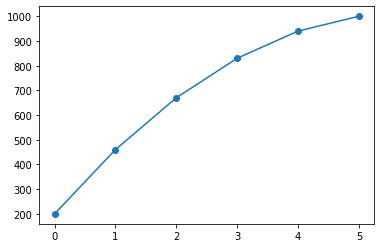

In [9]:
conduccion_1d(0.02,1.0,5.0,200,1000,4)

### Otro ejercicio

In [10]:
import ipywidgets as widgets

In [11]:
w = widgets.interactive(conduccion_1d,
                       k=widgets.fixed(0.02),
                       S=widgets.FloatSlider(max=1.0, min=0.0, value=0, step=0.2),
                       L=widgets.fixed(5.0),
                       TA=widgets.fixed(200),
                       TB=widgets.fixed(1000),
                       N= widgets.IntSlider(max=10, min=4, value=4))

## fixed determina los valores y slider va cambiando los valores

In [12]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…